In [ ]:
!pip install scikit-plot

In [ ]:

import pandas as pd
import numpy as np
import gdown
import os

eeg_image_directory = '/content/eeg_sz_spectrograms/' # must end with file seperator
gdown.download('https://drive.google.com/uc?id=1CQwVM0OpOKAhfk6qvgbGHV8OLguYH_qJ', 'eeg_sz_spectrograms.zip', quiet=False)
!unzip -qq eeg_sz_spectrograms.zip -d /content/eeg_sz_spectrograms0
os.rename('/content/eeg_sz_spectrograms0/content/drive/My Drive/ML Projects/data/MSU.ru__gen_data_5s_70pct_overlap_-_fractional_noverlap_all_channels_sml_all_participants_v2',
          eeg_image_directory)


Downloading...
From: https://drive.google.com/uc?id=1CQwVM0OpOKAhfk6qvgbGHV8OLguYH_qJ
To: /content/eeg_sz_spectrograms.zip
118MB [00:00, 278MB/s]


In [ ]:
# create train and test sets
# Use EEG of Sz for testing
# Extract files from an eeg_grp2 spectrogram directory where files are saved by subject

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random

from shutil import copyfile
import os 

rand_seed = 1

ignore_list = []
hc_subject_ids = ['hc' + str(i) for i in range(38) if "h{:02}".format(i) not in ignore_list] 
#There are 45 Sz participants. Select 38 of those to match with the control group
rand = random.Random(1)
sz_subject_id_range = [i for i in range(45) if "s{:02}".format(i) not in ignore_list]
sz_subject_ids = rand.sample(sz_subject_id_range, k=38) 
sz_subject_ids = ['sz' + str(i) for i in sz_subject_ids]

train_grp1, test_grp1 = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)
train_grp2, test_grp2 = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)

train_grp1, validate_grp1 = train_test_split(train_grp1, test_size=0.25, random_state=rand_seed) #.25 * .8 = .2
train_grp2, validate_grp2 = train_test_split(train_grp2, test_size=0.25, random_state=rand_seed)

train_ids = np.concatenate([train_grp1, train_grp2])
validate_ids = np.concatenate([validate_grp1, validate_grp2])
test_ids = np.concatenate([test_grp1, test_grp2])
  

print('Checking subject IDs')
print('HC group')
print(hc_subject_ids)
print('Sz group: ')
print(sz_subject_ids)
print('Train IDs: ')
print(train_ids)
print('Validate IDs:')
print(validate_ids)
print('Test IDs:')
print(test_ids)

def gen_csv_and_copy_sz_files(image_dir, img_output_dir, participant_ids):
    subdir_data = []
    for group in ['hc', 'sz']: #['Healthy_Control', 'Sz_Patient']:
        for pid in os.listdir(image_dir + '/' + group): # by participant IDs
            if pid in participant_ids:
              for file in os.listdir(image_dir + '/' + group + '/' + pid):
                file_data = {'filename': file, 'label': group}
                subdir_data.append(file_data)
                copyfile(image_dir + '/' + group + '/' + pid + '/' + file, img_output_dir + '/' + group + '/' + file )
    return pd.DataFrame(subdir_data)


train_directory = 'all_train_images'
test_directory = 'all_test_images'
val_directory = 'all_validation_images'
all_images_directory = '/content/eeg_sz_spectrograms'
groups = ['hc', 'sz']
train_dirs = [train_directory, test_directory, val_directory]

for dir in train_dirs:
  for group in groups:
    output_group_dir = dir + '/' + group
    if not os.path.exists(output_group_dir):
      os.makedirs(output_group_dir)


train_df = gen_csv_and_copy_sz_files(image_dir=all_images_directory, 
                                img_output_dir=train_directory, participant_ids=train_ids)
test_df = gen_csv_and_copy_sz_files(image_dir=all_images_directory, 
                                img_output_dir=test_directory, participant_ids=validate_ids)
validation_df = gen_csv_and_copy_sz_files(image_dir=all_images_directory, 
                                img_output_dir=val_directory, participant_ids=test_ids)
print(test_df.head())



Checking subject IDs
HC group
['hc0', 'hc1', 'hc2', 'hc3', 'hc4', 'hc5', 'hc6', 'hc7', 'hc8', 'hc9', 'hc10', 'hc11', 'hc12', 'hc13', 'hc14', 'hc15', 'hc16', 'hc17', 'hc18', 'hc19', 'hc20', 'hc21', 'hc22', 'hc23', 'hc24', 'hc25', 'hc26', 'hc27', 'hc28', 'hc29', 'hc30', 'hc31', 'hc32', 'hc33', 'hc34', 'hc35', 'hc36', 'hc37']
Sz group: 
['sz8', 'sz36', 'sz4', 'sz16', 'sz7', 'sz31', 'sz28', 'sz30', 'sz24', 'sz13', 'sz6', 'sz39', 'sz1', 'sz43', 'sz35', 'sz19', 'sz33', 'sz38', 'sz0', 'sz22', 'sz14', 'sz44', 'sz40', 'sz18', 'sz3', 'sz10', 'sz26', 'sz21', 'sz17', 'sz41', 'sz27', 'sz34', 'sz29', 'sz20', 'sz37', 'sz15', 'sz23', 'sz11']
Train IDs: 
['hc5' 'hc0' 'hc15' 'hc28' 'hc30' 'hc11' 'hc31' 'hc7' 'hc32' 'hc26' 'hc8'
 'hc24' 'hc6' 'hc19' 'hc18' 'hc37' 'hc12' 'hc14' 'hc4' 'hc23' 'hc33'
 'hc34' 'sz31' 'sz8' 'sz19' 'sz17' 'sz27' 'sz39' 'sz34' 'sz30' 'sz29'
 'sz26' 'sz24' 'sz3' 'sz28' 'sz22' 'sz0' 'sz11' 'sz1' 'sz35' 'sz7' 'sz18'
 'sz20' 'sz37']
Validate IDs:
['hc13' 'hc16' 'hc10' 'hc36' 'hc20' '

In [ ]:
%cd /content

#!git clone https://github.com/zhangrong1722/CheXNet-Pytorch.git binaryCNN

gdown.download('https://drive.google.com/uc?id=1TKqBlg7bzFV9kljftUgJVmiDcyXSxJ-Y', 'main.py', quiet=False) 

train_directory = '/content/all_train_images'
test_directory = '/content/all_test_images'
validation_directory = '/content/all_validation_images'


/content


Downloading...
From: https://drive.google.com/uc?id=1TKqBlg7bzFV9kljftUgJVmiDcyXSxJ-Y
To: /content/main.py
100%|██████████| 16.1k/16.1k [00:00<00:00, 13.8MB/s]


In [ ]:
%cd /content/

import timeit
import math
start = timeit.default_timer()

!python main.py  --train_dir {train_directory}  --validation_dir {validation_directory}  --test_dir {test_directory} --epochs 400

stop = timeit.default_timer()
hrs = math.floor((stop - start)/60/60)
minutes =((stop - start)/60) -hrs*60 
print('\n\nExecution time: {} hrs {} minutes'.format(hrs, minutes ))

Streaming output truncated to the last 5000 lines.
Train Epoch: 163 [480/1628 (29%)]	Loss: 0.000000
Train Epoch: 163 [600/1628 (37%)]	Loss: 0.000000
Train Epoch: 163 [720/1628 (44%)]	Loss: 0.000000
Train Epoch: 163 [840/1628 (52%)]	Loss: 0.000000
Train Epoch: 163 [960/1628 (59%)]	Loss: 0.000000
Train Epoch: 163 [1080/1628 (66%)]	Loss: 0.000000
Train Epoch: 163 [1200/1628 (74%)]	Loss: 0.000000
Train Epoch: 163 [1320/1628 (81%)]	Loss: 0.000000
Train Epoch: 163 [1440/1628 (88%)]	Loss: 0.000000
Train Epoch: 163 [1560/1628 (96%)]	Loss: 0.000000
Training Loss: 0.0000 Acc: 100.0000
length of validation loader:  60

Validation set: Average loss: 0.0000, Accuracy: 592/592 (100.000%)

Epoch 164/400
----------
Train Epoch: 164 [0/1628 (0%)]	Loss: 0.000000
Train Epoch: 164 [120/1628 (7%)]	Loss: 0.000000
Train Epoch: 164 [240/1628 (15%)]	Loss: 0.000000
Train Epoch: 164 [360/1628 (22%)]	Loss: 0.000000
Train Epoch: 164 [480/1628 (29%)]	Loss: 0.000000
Train Epoch: 164 [600/1628 (37%)]	Loss: 0.000000
T

In [ ]:
import matplotlib.pyplot as plt
import itertools

# modified from main.py https://github.com/zhangrong1722/CheXNet-Pytorch

def plt_roc(test_y, probas_y, plot_micro=False, plot_macro=False):
    assert isinstance(test_y, list) and isinstance(probas_y, list), 'the type of input must be list'
    skplt.metrics.plot_roc(test_y, probas_y, plot_micro=plot_micro, plot_macro=plot_macro)
    plt.savefig('roc_auc_curve.png')
    plt.show()
    plt.close()


###########################################
# Define confusion matrix and ROC visualization functions
# from https://colab.research.google.com/drive/1ISfhxFDntfOos7cOeT7swduSqzLEqyFn#scrollTo=UiKRYOWPfhJs

def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          cv=10):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.locator_params(nbins=2)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
best_model_preds = pd.read_csv('best_val_model_predictions.csv')
pred_y = best_model_preds['pred_y'].values
test_y = best_model_preds['test_y'].values
probas_y = [s.replace('[', '').replace(']', '').split(', ') for s in best_model_preds['probas_y'].values]
probas_y = [[float(t[0]), float(t[1])] for t in probas_y]


Confusion matrix, without normalization


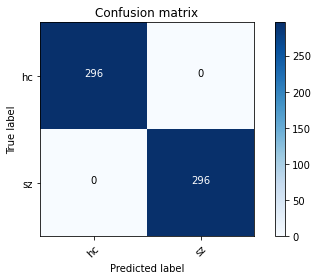

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(pred_y, test_y)
plot_confusion_matrix(confusion,
                      classes=['hc', 'sz'],
                      title='Confusion matrix')


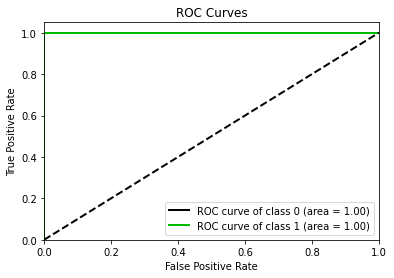

In [ ]:
!pip install scikit_plot
import scikitplot as skplt

plt_roc(list(test_y), list(probas_y))

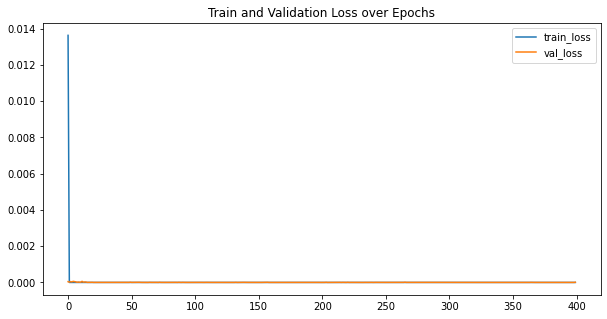

In [ ]:
metrics = pd.read_csv('metrics_by_epoch.csv')
metrics.head()
#TODO chart these values

metrics[['train_loss', 'val_loss']].plot(figsize=(10,5), title='Train and Validation Loss over Epochs')

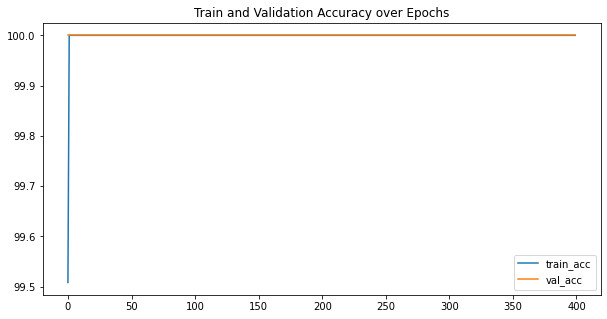

In [ ]:
metrics[['train_acc', 'val_acc']].plot(figsize=(10,5), title='Train and Validation Accuracy over Epochs')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

auc = roc_auc_score(test_y, pred_y)
print('AUC score for validation set: ', auc)


f1_macro = f1_score(test_y, pred_y, average='macro')
f1_micro = f1_score(test_y, pred_y, average='micro')

print('F1 score (average=macro): {}     F1 score (average=micro): {}'.format(f1_macro, f1_micro))


AUC score for validation set:  1.0
F1 score (average=macro): 1.0     F1 score (average=micro): 1.0
